<h1 align='center'>  <font size = '6' color='red'> Practical 14: Hypothesis Test Part 3 <font> </h1>


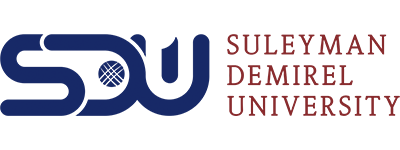

<br>

 
    
  <center align="left">    <center align="left"><center align="left"> <font color='dark blue'><font style= 'bold' size='3' color='dark'>  Instructors: Khaled Mohamad, Aziza Aipenova, Dauren Ayazbayev, Ainur Issabek, Arailym Serikbay, Dinara Khashimova, and Khurshida Patullayeva <font> </center>

In [43]:
#import the rquired lib.
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Q1

Group of customers are interested to test whether the colors of M&M candies are distributed according to the proportions reported by the manufacturer. The manufacturer claims that the proportions of colors are:
Brown: 13%,  Yellow: 14%, Red: 13%, Green: 16%, Orange: 20%, and Blue: 24%

We collect a random sample of 100 M&M candies and count the number of each color. The observed counts are:

Brown: 10, Yellow: 14, Red: 13, Green: 20, Orange: 18, Blue: 25

They want to perform the chi-square goodness of fit test at alpha = 0.05.


#### Solution:

#### Define your hypothesis    

H0: The distribution of colors preferences follows the expected distribution.
H1: The distribution of colors preferences does not follow the expected distribution.

#### Put observed and expected data in lists

In [44]:
import scipy.stats as stats

observed_counts = [10, 14, 13, 20, 18, 25]

expected_proportions = [0.13, 0.14, 0.13, 0.16, 0.20, 0.24]

total_count = sum(observed_counts)
expected_counts = [count * total_count for count in expected_proportions]

chi2_statistic = sum([(o - e)**2 / e for o, e in zip(observed_counts, expected_counts)])

df = len(expected_proportions) - 1

print("Chi-square statistic:", chi2_statistic)
print("Degrees of freedom:", df)

Chi-square statistic: 1.933974358974359
Degrees of freedom: 5


#### Use scipy.stats to perform chi-square goodness of fit test

In [45]:
alpha = 0.05

critical_value = stats.chi2.ppf(1 - alpha, df)
print("Critical value:", critical_value)

if chi2_statistic < critical_value:
    print("chi2_statistic < critical_value: Fail to reject the null hypothesis.")
else:
    print("chi2_statistic > critical_value: Reject the null hypothesis.")

Critical value: 11.070497693516351
chi2_statistic < critical_value: Fail to reject the null hypothesis.


#### Decide and conclude

# Q2

In a certain town a journalist wants to know whether or not gender is associated with political party preference. He decides to take a simple random sample of 500 voters and survey them on their political party preference. The following table shows the results of the survey:


|Gender	| Republican|Democrat| Independent|Total|
|---|---|---|---|---
|Male| 120| 90| 40| 250|
|Female| 110| 95| 45| 250|
|Total|	230| 185| 85| 500|

He wants use a chi-square test of independence to determine if there is a statistically significant association between the two variables. The desiered level of significance is 0.05. 

#### Solution

#### Define your hypothesis

H0: There is gender is not associated with political party.
H1: There is gender is associated with political party


#### Create one list includes two rows of the observed frequencies

In [46]:
import scipy.stats as stats

observed_counts = [[120, 110],
                   [90, 95],
                   [40, 45]]

expected_counts = [[115, 115],
                   [92.5, 92.5],
                   [42.5, 42.5]]

chi2_statistic = stats.chi2_contingency(observed_counts, expected_counts)[0]

df = (len(observed_counts) - 1) * (len(observed_counts[0]) - 1)

print("Chi-square statistic:", chi2_statistic)
print("Degrees of freedom:", df)


Chi-square statistic: 0.8640353908896109
Degrees of freedom: 2


#### Use scipy.stats to perform Chi square of independence

In [47]:
alpha = 0.05

critical_value = stats.chi2.ppf(1 - alpha, df)
print("Critical value:", critical_value)
if chi2_statistic < critical_value:
    print("chi2_statistic < critical_value: Fail to reject the null hypothesis.")
else:
    print("chi2_statistic > critical_value: Reject the null hypothesis.")

Critical value: 5.991464547107979
chi2_statistic < critical_value: Fail to reject the null hypothesis.


#### Decide and conclude

# Q3

A researcher wants to compare the effects of three different types of exercise (Aerobic, Anaerobic, and Yoga) on the blood pressure of healthy adults. He randomly assigns 15 participants to each group and measures their blood pressure after 12 weeks of training. The data are shown below:


| Group| Blood Pressure |
| --- | --- | 
| Aerobic| 120, 125, 118, 122, 119, 124, 117, 121, 123, 126, 115, 116, 114, 118, 120 |
| Anaerobic  | 130, 135, 128, 132, 129, 134, 127, 131, 133, 136, 125, 126, 124, 128, 130 |
| Yoga  | 110, 115, 108, 112, 109, 114, 107, 111, 113, 116, 105, 106, 104, 108, 110 |

The researcher wants to test the following hypotheses at α = 0.05:

    H0: The mean blood pressure is the same for all three groups. 

    H1: The mean blood pressure is not the same for all three groups.



#### Solution

#### Create lists for the samples

In [48]:
aerobic_bp = [120, 125, 118, 122, 119, 124, 117, 121, 123, 126, 115, 116, 114, 118, 120]
anaerobic_bp = [130, 135, 128, 132, 129, 134, 127, 131, 133, 136, 125, 126, 124, 128, 130]
yoga_bp = [110, 115, 108, 112, 109, 114, 107, 111, 113, 116, 105, 106, 104, 108, 110]

#### Check the sample distrbuition using kde plot

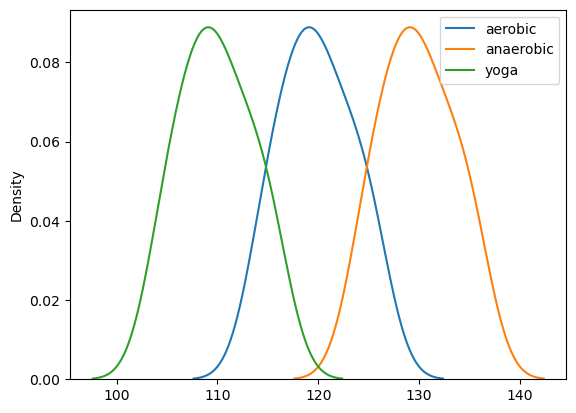

In [49]:
#Let us check their distrbuition
sns.kdeplot(aerobic_bp, label = "aerobic")
sns.kdeplot(anaerobic_bp, label = "anaerobic")
sns.kdeplot(yoga_bp, label = "yoga")
plt.legend()
plt.show()

#### Use scipy.stats to calculate ANOVA F- test 

In [50]:
f_statistic, p_value = stats.f_oneway(aerobic_bp, anaerobic_bp, yoga_bp)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 113.06532663316578
P-value: 1.2386805157791061e-17


#### Decide and conclude

In [51]:
alpha = 0.05

if p_value < alpha:
    print("p_value < alpha: Reject the null hypothesis.")
else:
    print("p_value > alpha: Fail to reject the null hypothesis.")

p_value < alpha: Reject the null hypothesis.
